### Import packages

In [1]:
from __future__ import print_function
import IPython
import numpy as np
import pandas as pd
from mnist import MNIST
import keras
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
K.set_image_dim_ordering('th')
%matplotlib inline

Using TensorFlow backend.


### Generic routine to plot data

In [2]:
def plot_data(data, random=0):
    # create a grid of 3x3 images
    for i in range(0, 9):
        # display random images from data sample
        if random:
            idx = np.random.randint(0,data.shape[0])
        else:
            idx = i
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(data[idx].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()

### Define model paramters

In [3]:
# val_acc: 85.99
epochs = 5
batch_size = 32
num_classes = 10
dropout = 0.1
optimizer='nadam'
activation='relu'

###  Obtain train/test data

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
mndata = MNIST(path='/Users/srianant/fashion-mnist/data/fashion/', )
x_train, y_train = mndata.load_training()
x_test, y_test = mndata.load_testing()

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Reshape to 4D as required by keras conv2D
x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
input_shape = (1, img_rows, img_cols)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("input_shape: ",input_shape)

x_train:  (60000, 1, 28, 28)
x_test:  (10000, 1, 28, 28)
input_shape:  (1, 28, 28)


### Plot train data

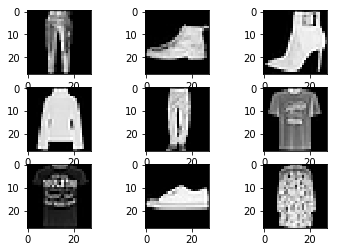

In [5]:
plot_data(x_train, 1)

### Plot test data

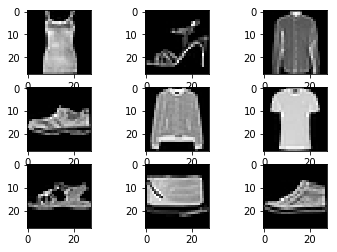

In [6]:
plot_data(x_test, 1)

### Normalize

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


### Define Keras DNN Model

Reference: https://github.com/raghakot/keras-vis/blob/master/examples/mnist/attention.ipynb

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation=activation,
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation=activation))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout))
model.add(Conv2D(128, (3, 3), activation=activation))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout))
model.add(Conv2D(64, (3, 3), activation=activation))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(128, activation=activation))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 24, 24)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 12, 12)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 10, 10)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 5, 5)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 5, 5)         0         
__________

### Compile model with optimizer and loss function

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

### Fit model

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 995s - loss: 0.5304 - acc: 0.8038 - val_loss: 0.3675 - val_acc: 0.8649

### Evaluate model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
y_pred = model.predict(x_test)
y_pred.shape

### Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

np.set_printoptions(precision=2)

class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Plot non-normalized confusion matrix
pyplot.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

pyplot.show()